# Teleco Churn Prediction

## Introduction:
This project aims to predict customer churn in a telecommunications company. Customer churn, refers to the rate at which customers discontinue their services or stop doing business with a company. Understanding and predicting customer churn is essential for businesses to retain their valuable customers and enhance customer satisfaction.

In this project, we will use machine learning techniques to analyze historical customer data and identify patterns that can help predict whether a customer is likely to churn or not. By doing so, the telecommunications company can take proactive measures to retain potential churners and improve customer retention rates.

### Libraries:
Import necessary libraries and modules:
* Data manipulation:`Pandas`, and `NumPy`
* Visualisation: `Matplotlib`, and `Seaborn`
* Machine Learning and preprocssing: `Scikit-learn`

In [51]:
import warnings
warnings.filterwarnings('ignore')

In [53]:
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.model_selection import GridSearchCV

In [7]:
# Iterate through the '/kaggle/input' directory and its subdirectories
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv


In [8]:
df = pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2389,6161-ERDGD,Male,0,Yes,Yes,71,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,No,Electronic check,85.45,6300.85,No
4427,5278-PNYOX,Female,0,No,No,49,Yes,No,Fiber optic,No,...,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),100.65,4917.75,No
31,4929-XIHVW,Male,1,Yes,No,2,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),95.50,181.65,No
785,0691-IFBQW,Female,1,No,No,46,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,Yes,One year,Yes,Electronic check,110.00,4874.8,Yes
5200,6050-IJRHS,Female,0,Yes,Yes,70,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Electronic check,106.50,7397,No


### Explortary Data Analysis (EDA)  
EDA techniques are applied to gain insights into the dataset, identify patterns, and understand the distribution of variables.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [10]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

No missing data.

To focus on relevant information, we drop the `customerID` column from the DataFrame using since it appears to be an identifier and doesn't contribute to the analysis.

In [11]:
df.drop('customerID', axis=1, inplace=True)

When attempting to convert the `TotalCharges` column to a numeric data type, I encountered an error due to the presence of empty values `' '` in the column. To resolve this issue, we decided to remove the 11 rows containing these empty values since they do not significantly impact the overall dataset.

In [12]:
df[df.TotalCharges == ' '].head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No


In [13]:
df[df.TotalCharges == ' '].shape

(11, 20)

In [14]:
df.drop(index=df[df.TotalCharges == ' '].index, axis=0, inplace=True)

Convert the TotalCharges column to float data type

In [15]:
df.TotalCharges = df.TotalCharges.astype('float')

In [16]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

For a better understanding of the data distribution, we display summary statistics for numerical columns.

In [17]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [18]:
df.Churn.value_counts(normalize=True)

No     0.734215
Yes    0.265785
Name: Churn, dtype: float64

It appears that `73.4%` of customers stay and `26.6%` churn.

To gain better insights into the dataset, we created histograms to visualize the distribution of `tenure` and `MonthlyCharges` for both churned and stayed customers. These histograms provide a clear picture of how these two variables differ between customers who churned and those who stayed with the company

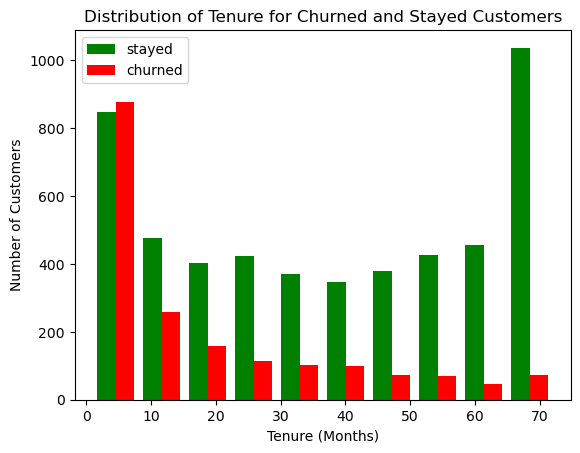

In [19]:
churn_tenure_yes = df[df.Churn == 'Yes'].tenure
churn_tenure_no = df[df.Churn == 'No'].tenure

plt.hist([churn_tenure_no, churn_tenure_yes], color=['green','red'], label=['stayed', 'churned'])
plt.title('Distribution of Tenure for Churned and Stayed Customers')
plt.xlabel('Tenure (Months)')
plt.ylabel('Number of Customers')
plt.legend()
plt.show()

It appears that new customers have a higher tendency to churn, and the likelihood of churn decreases over time as the customer's tenure with the company increases. This finding suggests that customer loyalty tends to strengthen over the course of their relationship with the telecommunications company. By understanding this trend, the company can focus on implementing targeted retention efforts for new customers to reduce churn and enhance customer satisfaction during the early stages of their service subscription.

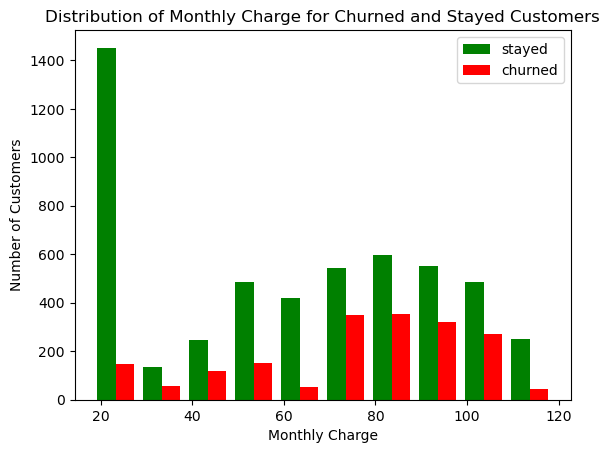

In [47]:
churn_mcharge_yes = df[df.Churn == 'Yes'].MonthlyCharges
churn_mcharge_no = df[df.Churn == 'No'].MonthlyCharges

plt.hist([churn_mcharge_no, churn_mcharge_yes], color=['green','red'], label=['stayed', 'churned'])
plt.title('Distribution of Monthly Charge for Churned and Stayed Customers')
plt.xlabel('Monthly Charge')
plt.ylabel('Number of Customers')
plt.legend()
plt.show()

We can observe that customers with lower monthly charges and those at specific price points, particularly around 70-110 monthly charges, tend to churn more frequently, suggesting the need for pricing optimization and targeted retention strategies.

### Preprocessing

Let see distinct values presents in each column.

In [21]:
def unique_value(df):
    for column in df:
        print(f'column: {column}\n {df[column].unique()}')

In [22]:
unique_value(df)

column: gender
 ['Female' 'Male']
column: SeniorCitizen
 [0 1]
column: Partner
 ['Yes' 'No']
column: Dependents
 ['No' 'Yes']
column: tenure
 [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
column: PhoneService
 ['No' 'Yes']
column: MultipleLines
 ['No phone service' 'No' 'Yes']
column: InternetService
 ['DSL' 'Fiber optic' 'No']
column: OnlineSecurity
 ['No' 'Yes' 'No internet service']
column: OnlineBackup
 ['Yes' 'No' 'No internet service']
column: DeviceProtection
 ['No' 'Yes' 'No internet service']
column: TechSupport
 ['No' 'Yes' 'No internet service']
column: StreamingTV
 ['No' 'Yes' 'No internet service']
column: StreamingMovies
 ['No' 'Yes' 'No internet service']
column: Contract
 ['Month-to-month' 'One year' 'Two year']
column: PaperlessBilling
 ['Yes' 'No']
column: PaymentMethod
 ['Electronic check' 'Maile

We simplify the data by treating both `"No phone service"` and `"No internet service"` as just `"No"` since they mean the same thing, making it easier for machine learning and avoiding confusion during model training.

In [23]:
df.MultipleLines.replace('No phone service', 'No',inplace=True)

In [24]:
replace_col = ['OnlineSecurity', 'OnlineBackup' ,'DeviceProtection' ,'TechSupport' ,'StreamingTV' ,'StreamingMovies']
for column in df[replace_col]:
    df[column].replace('No internet service', 'No', inplace=True)

In [25]:
unique_value(df[replace_col])

column: OnlineSecurity
 ['No' 'Yes']
column: OnlineBackup
 ['Yes' 'No']
column: DeviceProtection
 ['No' 'Yes']
column: TechSupport
 ['No' 'Yes']
column: StreamingTV
 ['No' 'Yes']
column: StreamingMovies
 ['No' 'Yes']


In [26]:
yes_no_columns = [col for col in df.columns if 'Yes' in df[col].values or 'No' in df[col].values]
yes_no_columns

/tmp/ipykernel_32/680948220.py:1: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  yes_no_columns = [col for col in df.columns if 'Yes' in df[col].values or 'No' in df[col].values]


['Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'PaperlessBilling',
 'Churn']

In [27]:
df1 = df.copy()

Converts categorical columns with binary values ('Yes'/'No') to numeric representation (0/1) using LabelEncoder.

In [28]:
for col in df1[yes_no_columns]:
    encode = LabelEncoder()
    df1[col] = encode.fit_transform(df1[col])

In [29]:
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [30]:
df1.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,0,0,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,0,0,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,Male,0,0,0,2,1,0,0,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1


Performs one-hot encoding on the remaining categorical columns to convert them into numerical format for use in machine learning algorithms.

In [31]:
df2 = pd.get_dummies(df1)

In [32]:
df2.head(2)

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,Churn,gender_Female,gender_Male,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,0,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0
1,0,0,0,34,1,0,0,1,0,1,...,0,0,1,0,1,0,0,0,0,1


Sscale features by apply Min-Max scaling to the tenure, MonthlyCharges, and TotalCharges columns to bring all features to a similar range.

In [33]:
scale_col = ['tenure','MonthlyCharges','TotalCharges']
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df2[scale_col])

In [34]:
df3 = df2.copy()
df3[scale_col] = scaled

In [35]:
X = df3.drop('Churn', axis=1)
y = df3[['Churn']]

### Model Building and Evaluation

Split the data into training and testing sets.

In [36]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

Build and evaluates five different machine learning models:  
* `Logistic Regression`
* `Naive Bayes`
* `Decision Tree`
* `K-Nearest Neighbors`
* `Support Vector Machine`
Then calculates the accuracy, precision, recall, and F1-score for each model, and plots the confusion matrix for each model.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/tmp/ipykernel_32/640542330.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/tmp/ipykernel_32/640542330.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({
/tmp/ipykernel_32/640542330.py:19: FutureWarning: The frame.append m

                    Model  Accuracy  Precision    Recall  F1 Score
0     Logistic Regression  0.806030   0.655941  0.567452  0.608496
1             Naive Bayes  0.721843   0.486111  0.824411  0.611597
2           Decision Tree  0.718999   0.471933  0.486081  0.478903
3     K-Nearest Neighbors  0.757110   0.540000  0.578158  0.558428
4  Support Vector Machine  0.800341   0.656757  0.520343  0.580645 





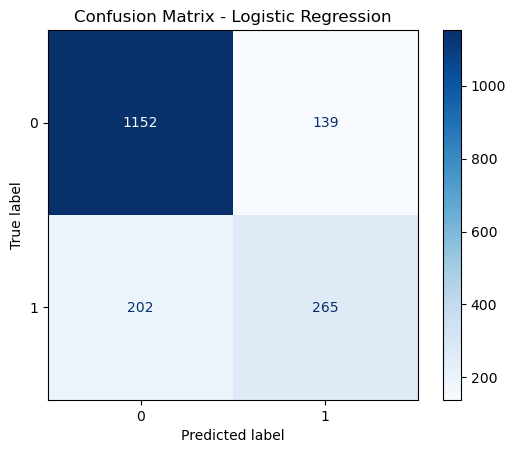

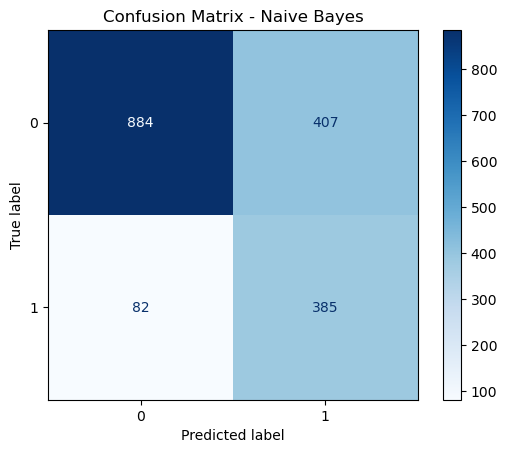

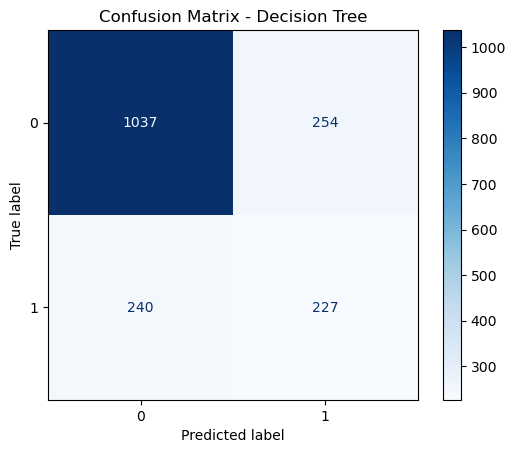

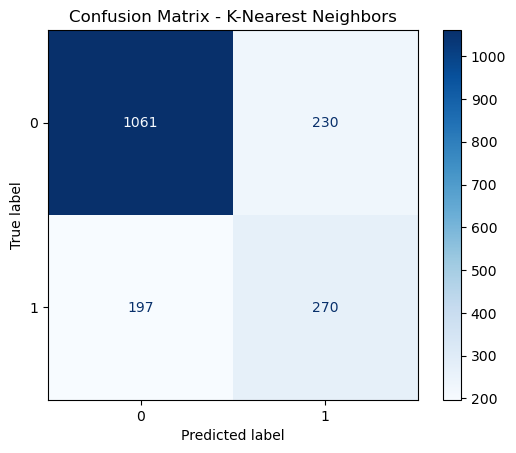

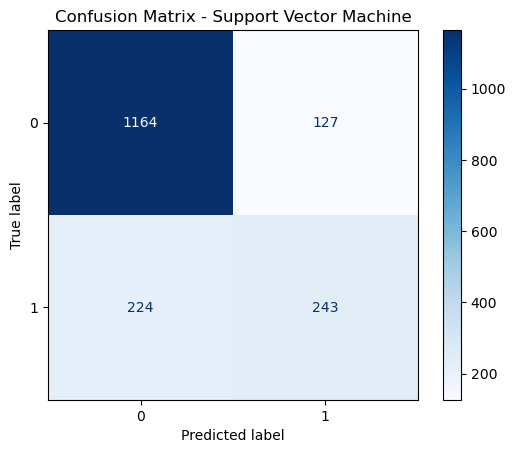

In [37]:
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Naive Bayes', GaussianNB()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Support Vector Machine', SVC())
]

metrics_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Loop through each model, fit, predict, and store the evaluation metrics
for model_name, model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    metrics_df = metrics_df.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }, ignore_index=True)

    conf_matrix = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
    disp.plot(cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')

print(metrics_df, '\n\n\n')
plt.show()

Above code displays a DataFrame containing the evaluation metrics for all five models and visualizes their confusion matrices.

The results showed that the Logistic Regression model outperformed the other models, achieving an accuracy of 80.60% and an F1-score of 60.85%. This model provides a good balance between correctly identifying churned and non-churned customers.

### Conclusion

**Findings:**

* New Customers: New customers have a higher likelihood of churning compared to those with a longer tenure. It is crucial for the company to focus on improving customer retention strategies for new customers during the early stages of their subscription to reduce churn.

* Monthly Charges: Customers with lower monthly charges and those at specific price points, particularly around 70-110 monthly charges, tend to churn more frequently. The company should consider optimizing pricing strategies to retain these customers.

* Best Model: The Logistic Regression model performed the best among the five models evaluated, with an accuracy of 80.60% and an F1-score of 60.85%. This model shows a good balance between precision and recall, making it the most suitable for predicting customer churn.

 **Rcommendations:**

* Retention Strategies: The company should focus on implementing proactive retention strategies for new customers, such as personalized onboarding, targeted promotions, and discounts to encourage long-term loyalty.

* Pricing Optimization: To retain customers with lower monthly charges and those at specific price points, the company should consider offering tailored pricing plans, discounts, or loyalty rewards to incentivize them to stay.

* Customer Engagement: The company should invest in improving customer engagement and satisfaction through excellent customer service, continuous feedback, and personalized communication to foster a strong customer-company relationship.

* Analyzing Churn Factors: Further analysis of customer churn factors, such as reasons for leaving, customer feedback, and service-related issues, can provide deeper insights into customer behavior and help fine-tune retention strategies.

* Regular Model Updates: The churn prediction model should be regularly updated and refined using new data to ensure its accuracy and effectiveness in identifying potential churners.